In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from subprocess import check_output

In [2]:
# EDA ( Exploratory Data Analysis )
df = pd.read_csv('C:/Users/AINUN/2019.csv')
print(plt.style.available) 
plt.style.use('ggplot')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [3]:
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [4]:
df.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [6]:
df.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [7]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
151    False
152    False
153    False
154    False
155    False
Length: 156, dtype: bool

In [8]:
df.rename(index = int, columns = {
    "Overall rank":"rank","Country or region": "country","Score": "score","GDP per capita":"gdp",
    "Social support":"social_support","Healthy life expectancy": "life_expectancy", 
    "Freedom to make life choices": "freedom",
    "Generosity": "generosity","Perceptions of corruption": "corruption"},inplace=True)

df.head()

,rank,country,score,gdp,social_support,life_expectancy,freedom,generosity,corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [9]:
df.describe()

,rank,score,gdp,social_support,life_expectancy,freedom,generosity,corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [10]:
# dari hasil tersebut diketahui jika pada kolom rank dan score secara keseluruhan, data memiliki rata" sekitar 0 
# dan memiliki standar deviasi kurang dari 1
# dapat disimpulkan berkisar 2.85 - 7.76

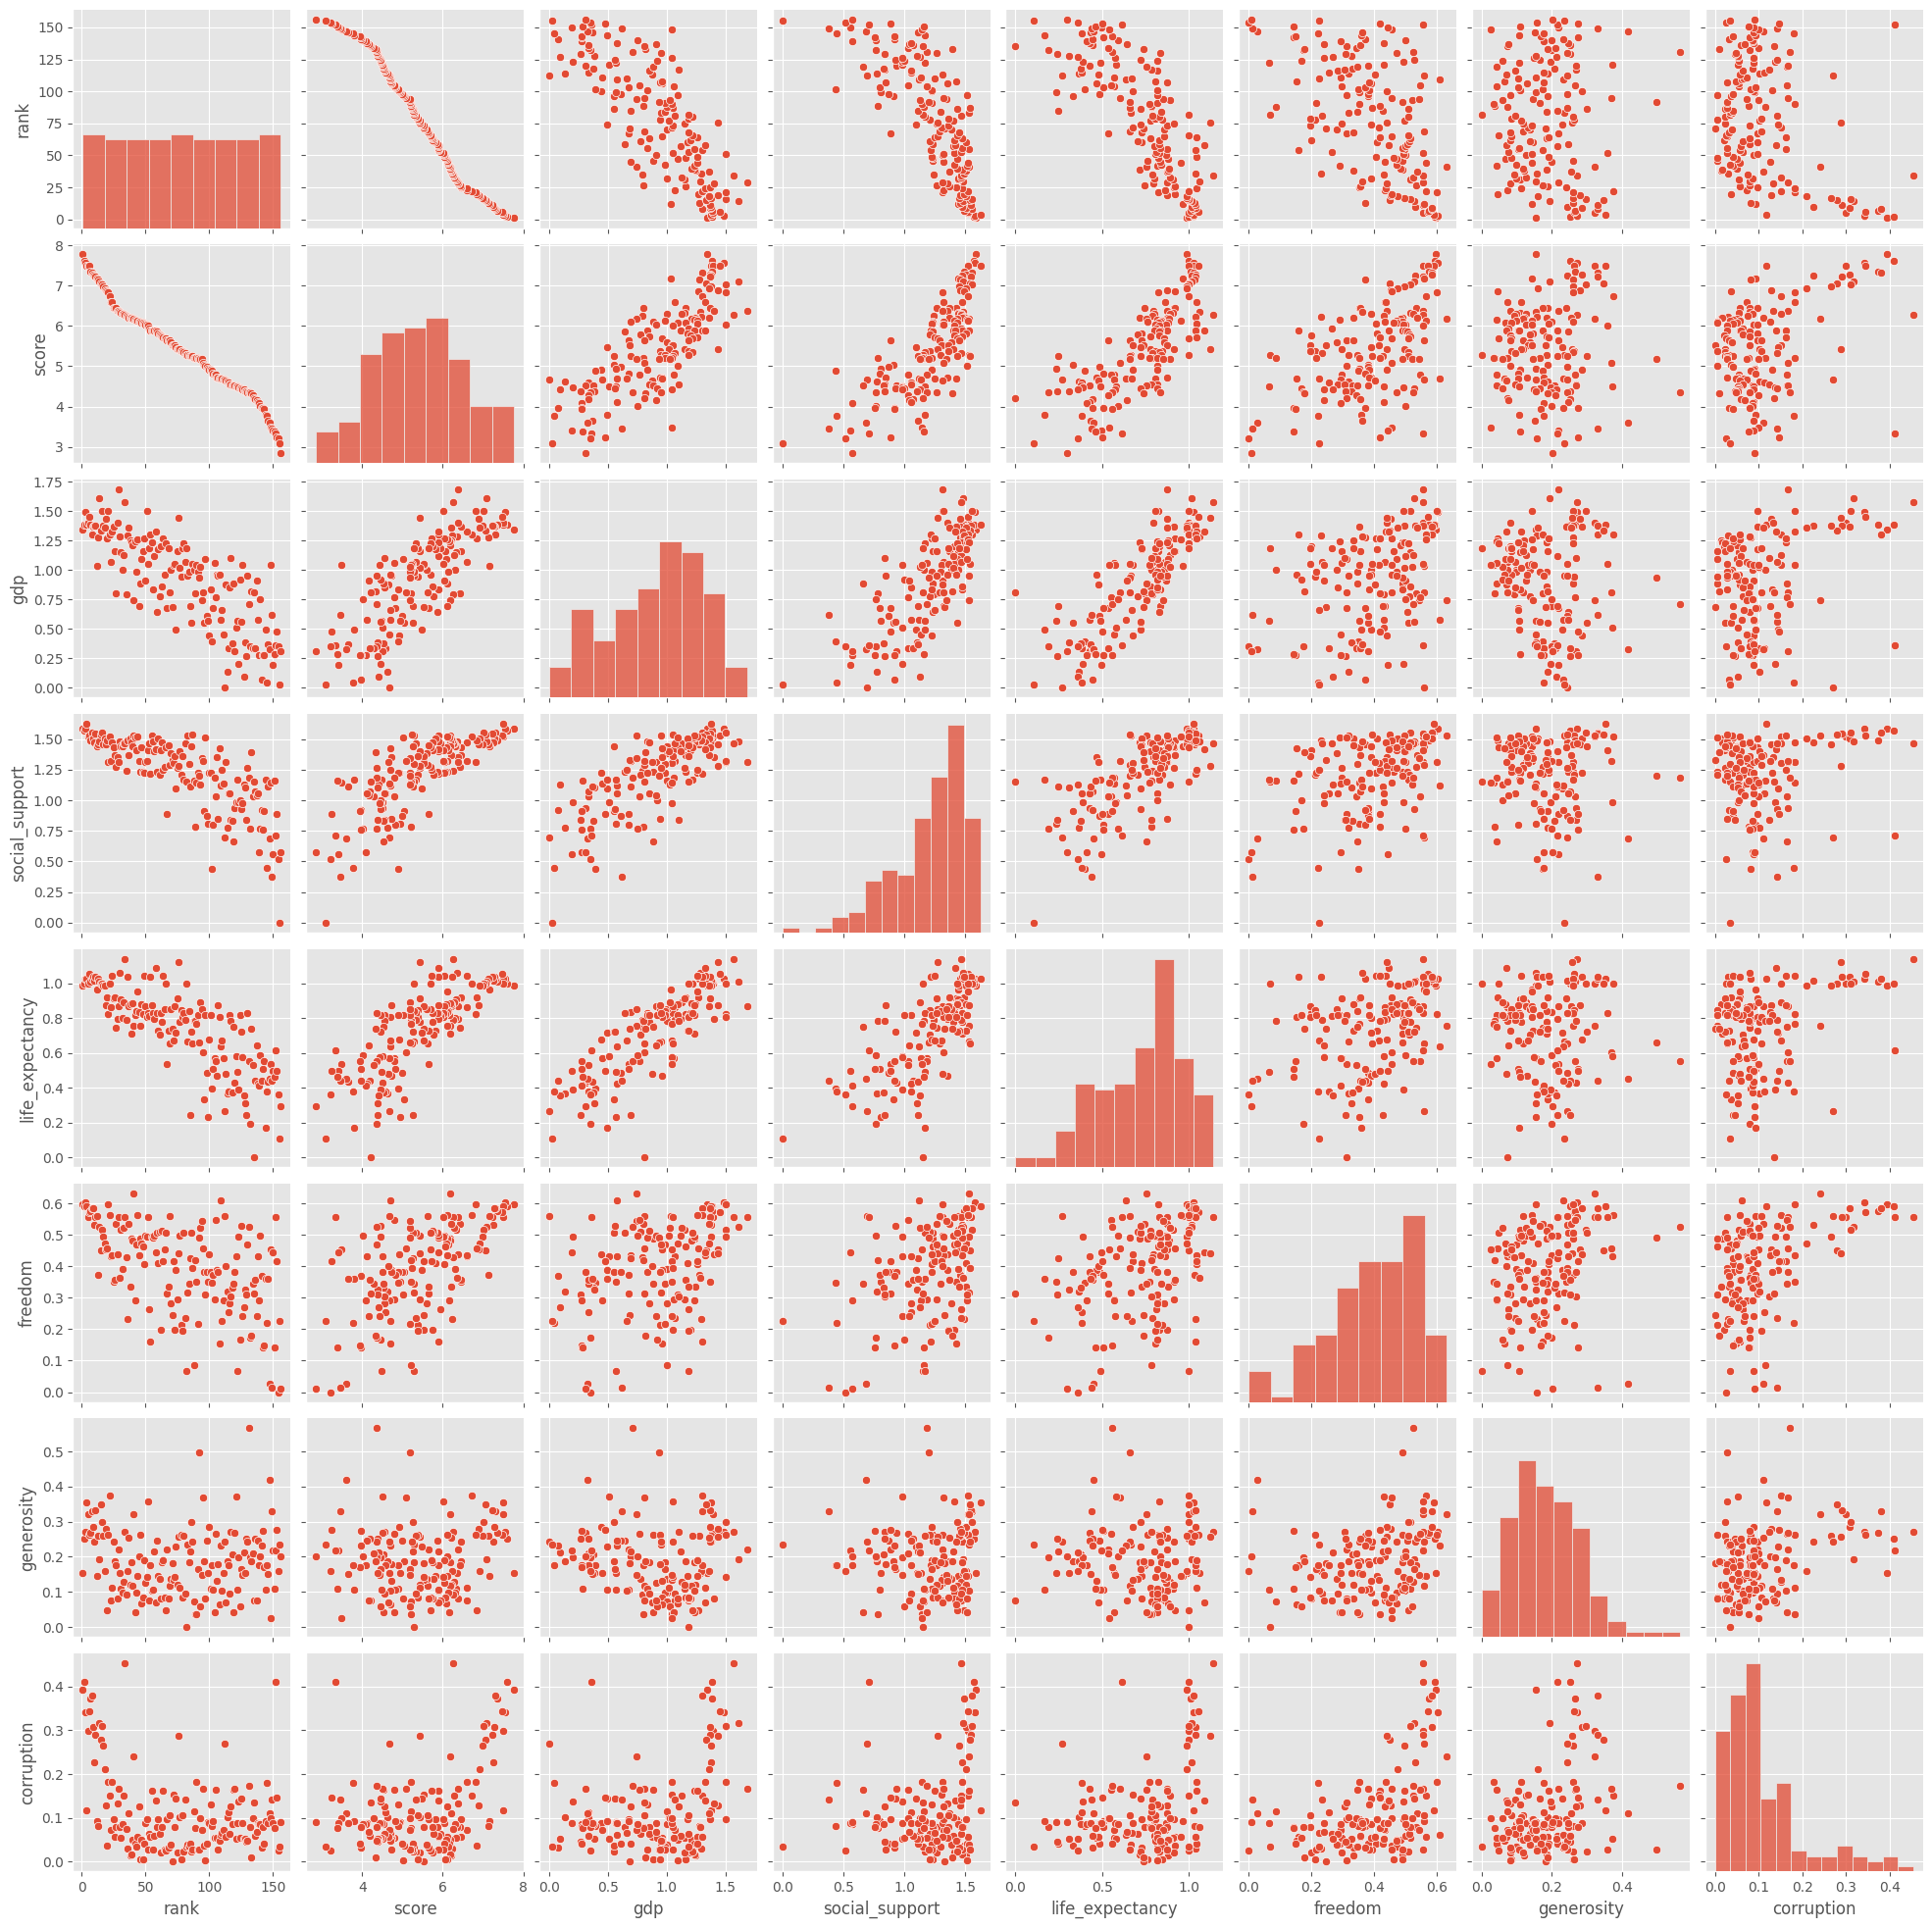

In [11]:
sns.pairplot(df)

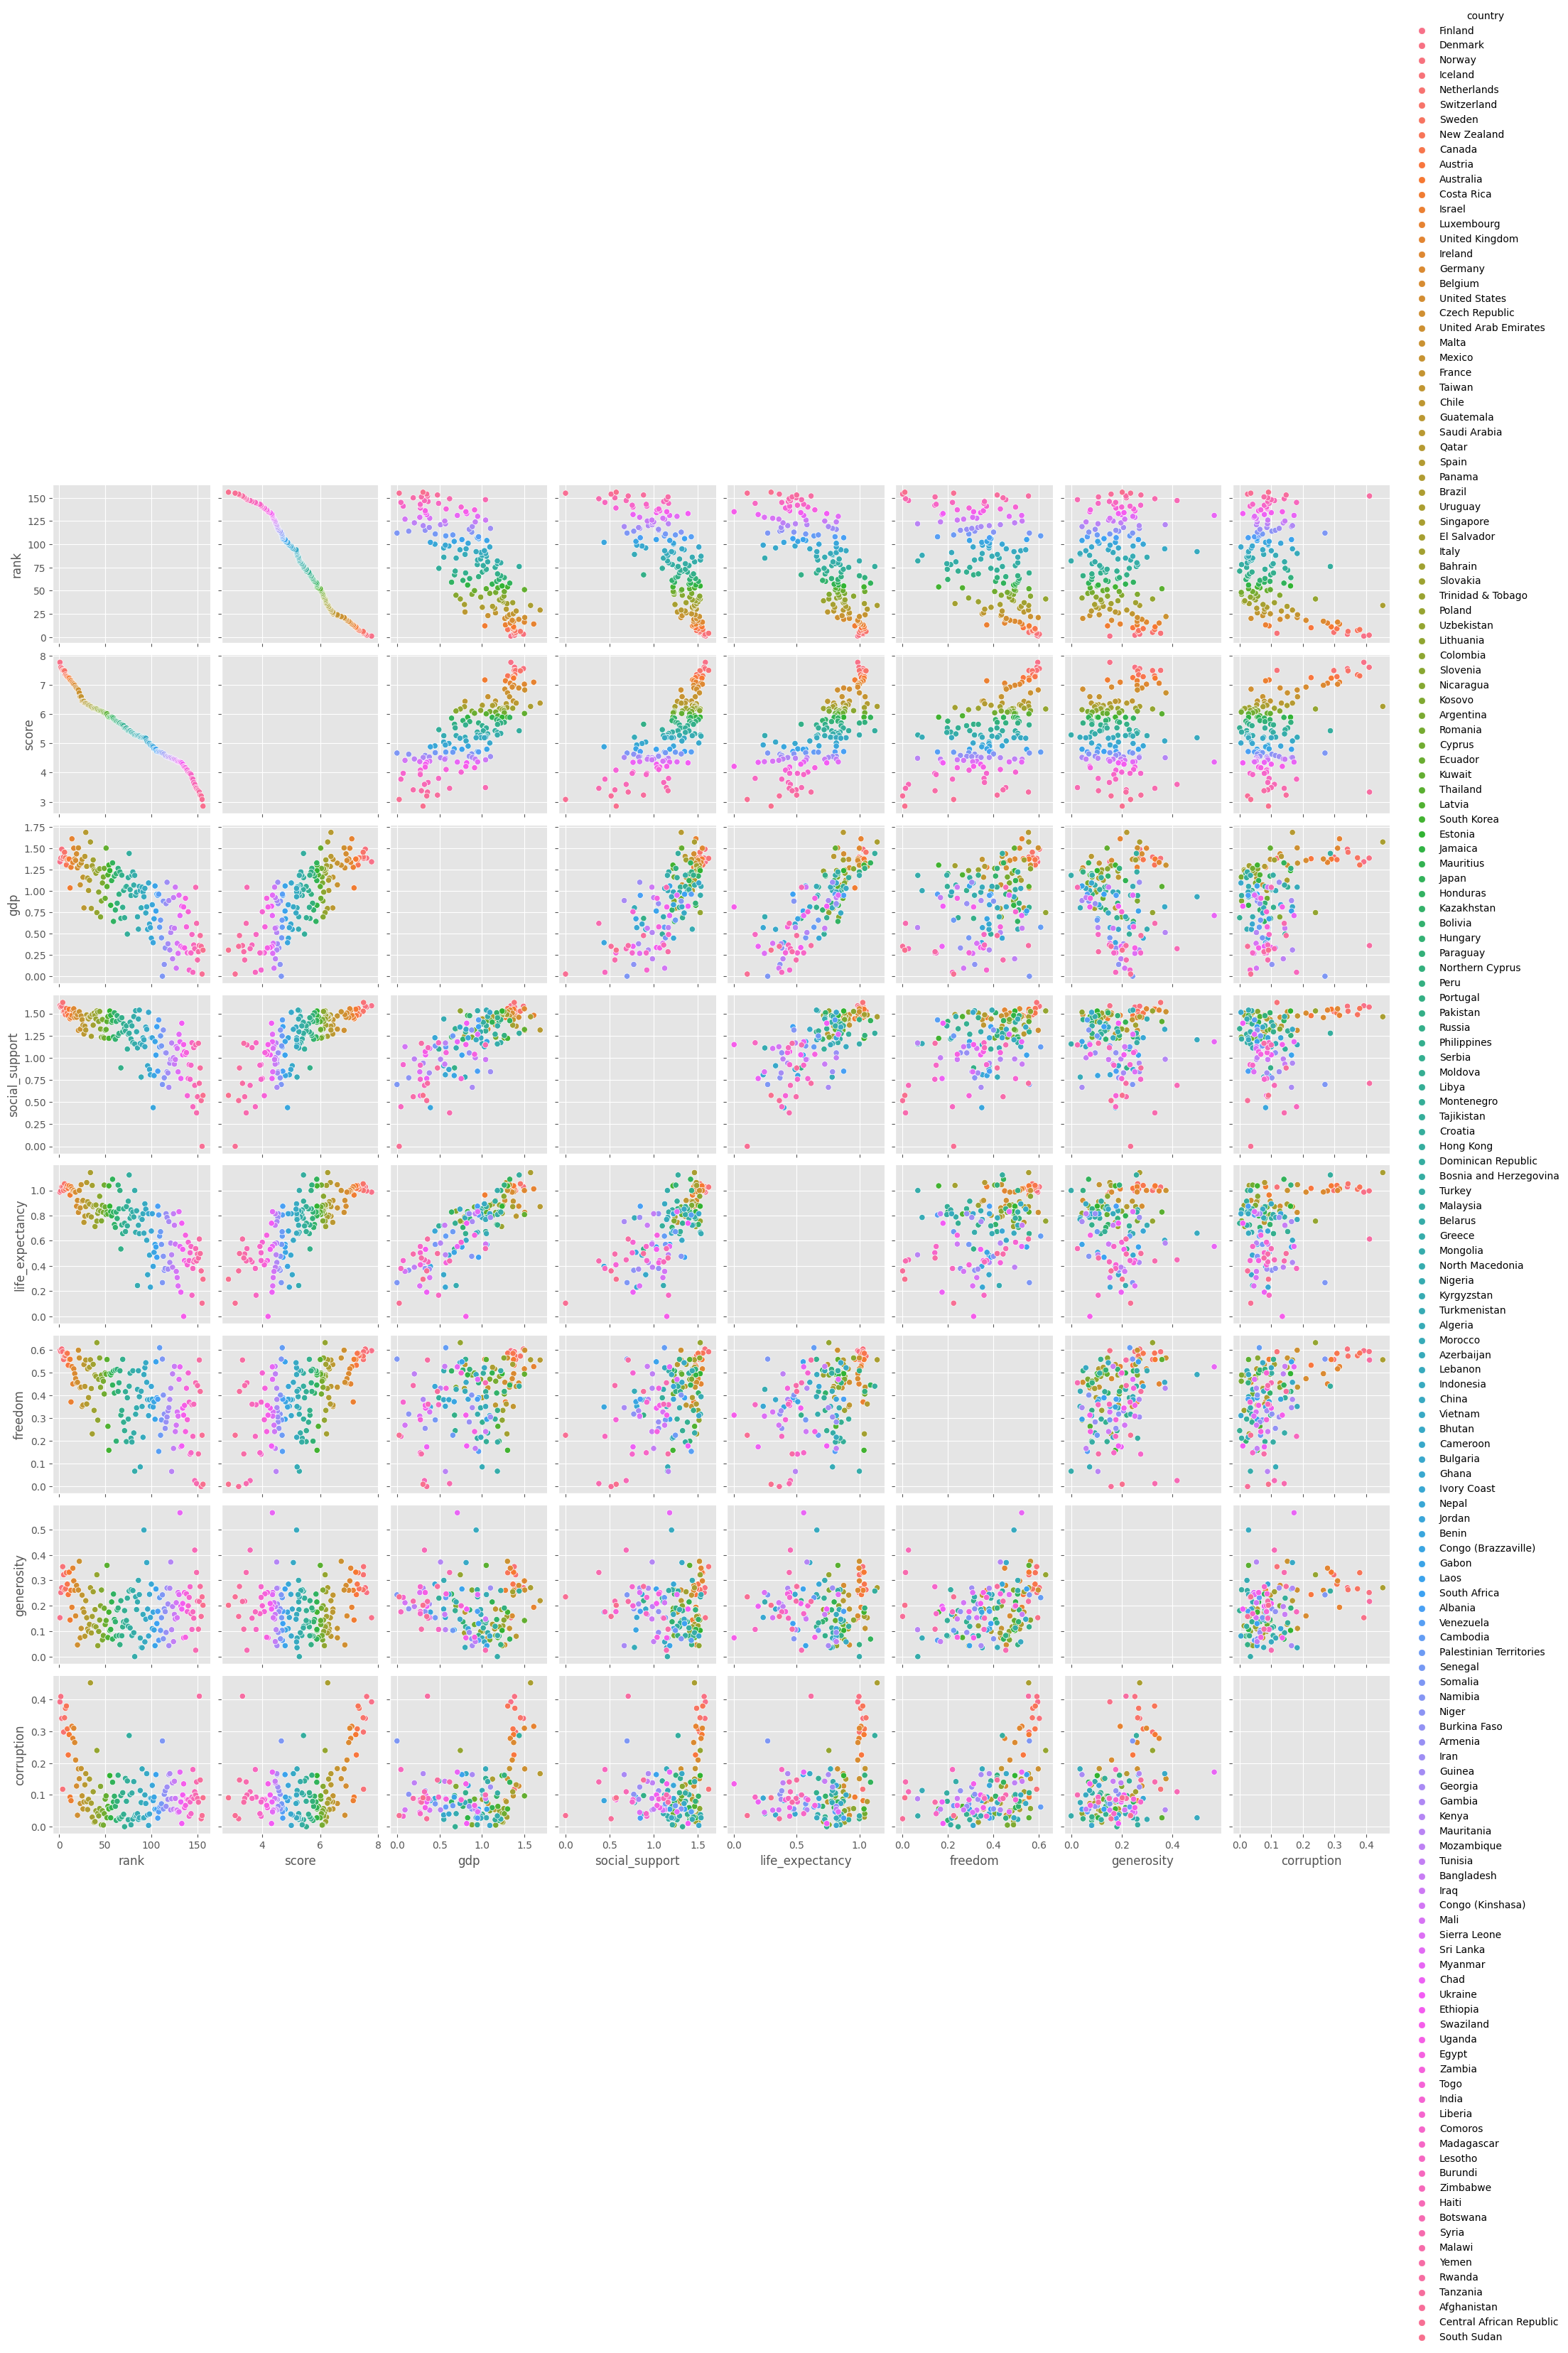

In [12]:
sns.pairplot(df, vars = ['rank', 'score', 'gdp', 'social_support', 'life_expectancy', 'freedom', 'generosity', 'corruption'], 
             hue = "country")

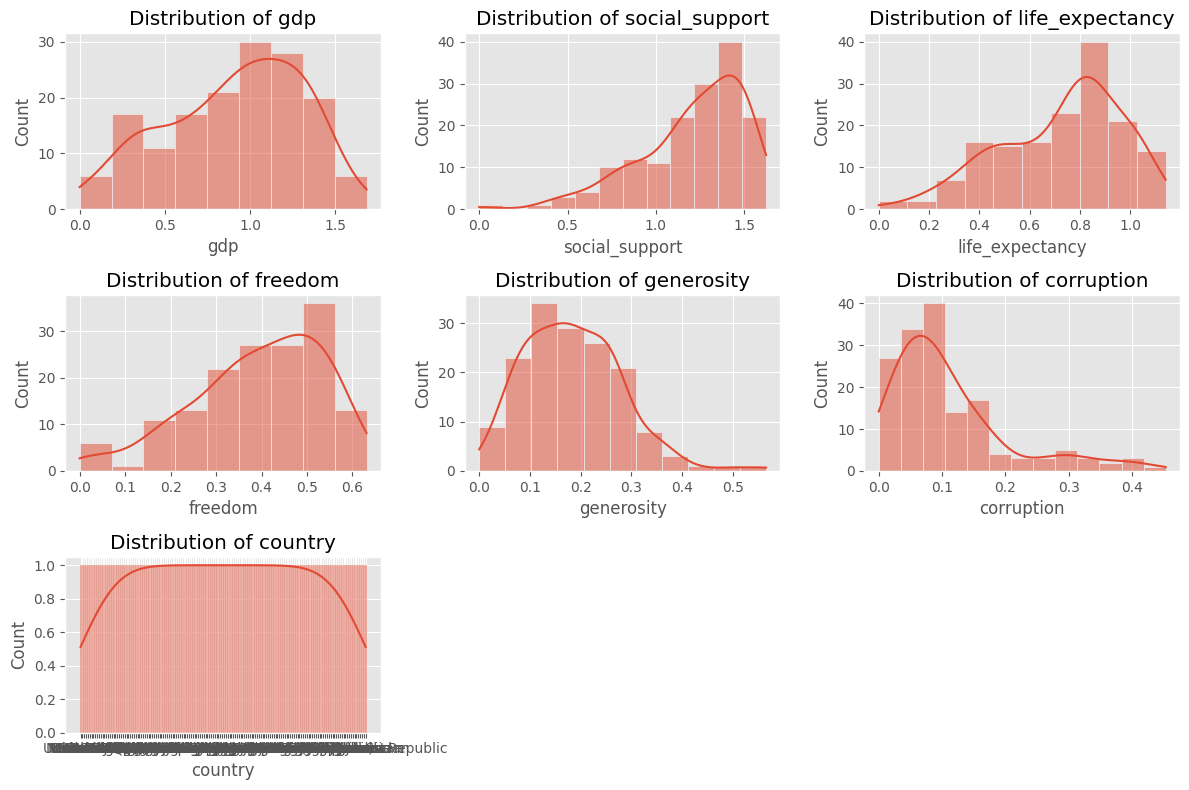

In [16]:
cols_to_visualize = ['gdp', 'social_support', 'life_expectancy', 'freedom', 'generosity', 'corruption']

# Menambahkan kolom 'country' ke dalam list
cols_to_visualize.append('country')

# Visualisasi distribusi variabel numerik
plt.figure(figsize=(12, 8))

for i, col in enumerate(cols_to_visualize):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

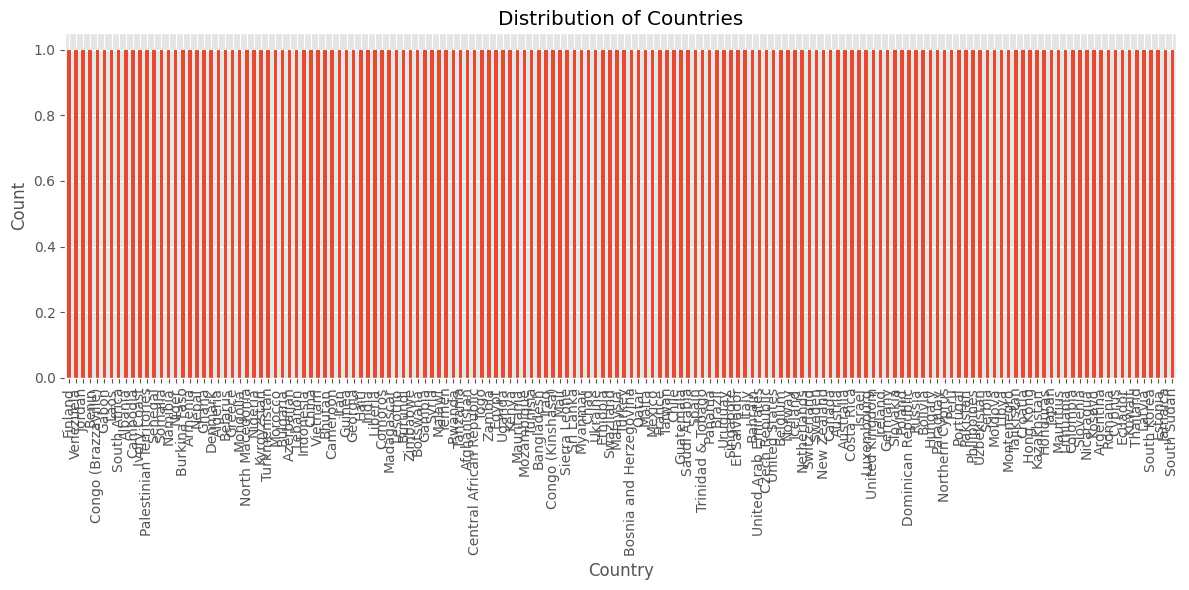

In [21]:
plt.figure(figsize=(12, 6))
df['country'].value_counts().plot(kind='bar')
plt.title('Distribution of Countries')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<Axes: >

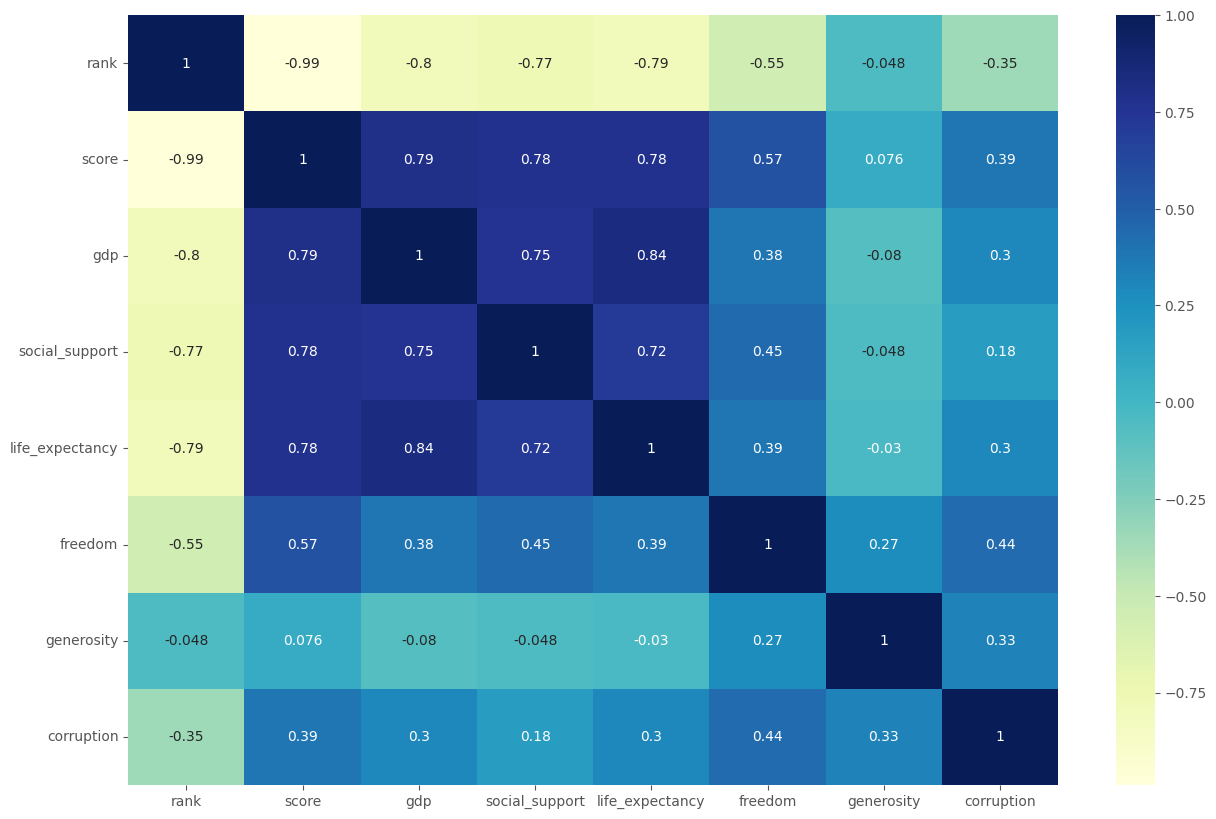

In [15]:
# Feature Selection (korelasi antar variabel)

f,ax= plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

In [25]:
# DATA PRE PROCESSING
# Contoh penanganan data missing values dengan mengisi nilai NaN dengan rata-rata kolom
df.fillna(df.mean(), inplace=True)  # Mengisi nilai NaN dengan rata-rata kolom

In [26]:
print(df.columns)

Index(['rank', 'country', 'score', 'gdp', 'social_support', 'life_expectancy',
       'freedom', 'generosity', 'corruption'],
      dtype='object')


In [27]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Pilih kolom numerik yang ingin diubah skala
cols_to_scale = ['gdp', 'social_support', 'life_expectancy', 'freedom', 'generosity', 'corruption']

# Inisialisasi scaler
scaler = MinMaxScaler()  # atau bisa menggunakan StandardScaler()

# Melakukan scaling pada kolom-kolom yang dipilih
df_scaled = df.copy()  # Membuat salinan dataset untuk diubah skala
df_scaled[cols_to_scale] = scaler.fit_transform(df_scaled[cols_to_scale])

In [28]:
# Contoh jika ada kolom kategorikal yang perlu diencode (contoh: kolom 'country')
# df_encoded = pd.get_dummies(df, columns=['country'])

In [29]:
# Contoh jika ingin menghapus outlier pada kolom 'life_expectancy' dengan batas 3 kali standar deviasi
std_dev = df['life_expectancy'].std()
mean_val = df['life_expectancy'].mean()
upper_bound = mean_val + 3 * std_dev
df = df[df['life_expectancy'] < upper_bound]

In [30]:
# Misalnya, melakukan penanganan outlier pada kolom 'gdp'
std_dev_gdp = df['gdp'].std()
mean_val_gdp = df['gdp'].mean()
upper_bound_gdp = mean_val_gdp + 3 * std_dev_gdp
df = df[df['gdp'] < upper_bound_gdp]

In [31]:
# Contoh normalisasi pada kolom tertentu (bisa menggunakan metode lain seperti L1 atau L2 normalization)
from sklearn.preprocessing import normalize

df['life_expectancy_normalized'] = normalize(df[['life_expectancy']], axis=0)

In [32]:
# Contoh membuat fitur baru berdasarkan kombinasi fitur yang sudah ada
df['combined_feature'] = df['gdp'] * df['life_expectancy']

In [33]:
# Contoh menggunakan LabelEncoder untuk encoding data kategorikal pada kolom 'country'
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['country_encoded'] = label_encoder.fit_transform(df['country'])

In [34]:
# FEATURE EXTRACTION
df['economic_health'] = df['gdp'] * df['social_support']

In [35]:
one_hot_encoded = pd.get_dummies(df['country'], prefix='country')
df = pd.concat([df, one_hot_encoded], axis=1)

In [36]:
df['log_gdp'] = np.log(df['gdp'])

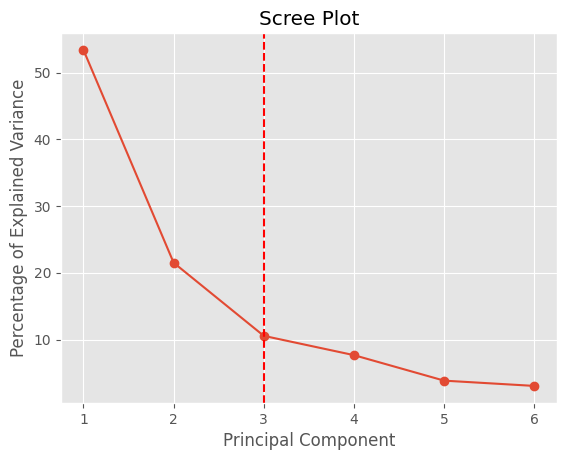

In [37]:
# PCA chossing dimensions
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(df_scaled[cols_to_scale])

percentage_variance = np.round(pca.explained_variance_ratio_ * 100, decimals=2)
xlabels = ['PC' + str(x) for x in range(1, len(percentage_variance)+1)]

plt.plot(range(1,len(percentage_variance)+1), percentage_variance, '-o')
plt.axvline(x=3, color='red', linestyle='--')
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [38]:
pca = PCA(n_components=3,random_state = 7)
PC = pca.fit_transform(df_scaled[cols_to_scale])
pca_happiness = pd.DataFrame(data = PC,
               columns = ['PC 1', 'PC 2','PC 3'])
 
pca_happiness.head(6)

,PC 1,PC 2,PC 3
0,-0.665256,0.302545,0.214608
1,-0.696071,0.396852,0.260834
2,-0.713376,0.308581,0.164823
3,-0.544468,0.107411,-0.152663
4,-0.601076,0.292847,0.152112
5,-0.678278,0.288294,0.206709


In [39]:
def biplot(score,n,m,coef,labels=None):
 
    xs = score[:,n]
    ys = score[:,m]
    p = coef.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,
                s=5, 
                color='red')
 
    for i in range(6):
        plt.arrow(0, 0, coef[i,n], 
                  coef[i,m],color = 'purple',
                  alpha = 0.5)
        plt.text(coef[i,n]* 1.15, 
                 coef[i,m] * 1.15, 
                 labels[i], 
                 color = 'black', 
                 ha = 'center', 
                 va = 'center')
 
    plt.xlabel("PC{}".format(n+1))
    plt.ylabel("PC{}".format(m+1))    
 
 
    plt.figure()

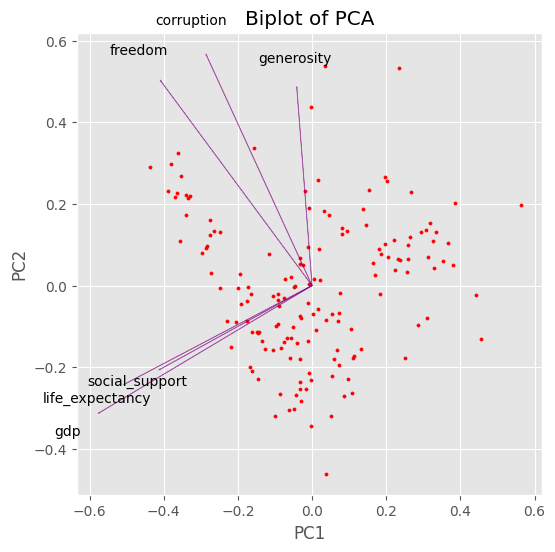

<Figure size 640x480 with 0 Axes>

In [40]:
fig, ax = plt.subplots(figsize = (6,6))
plt.title('Biplot of PCA')
 
biplot(PC,0,1, 
       np.transpose(pca.components_), cols_to_visualize)

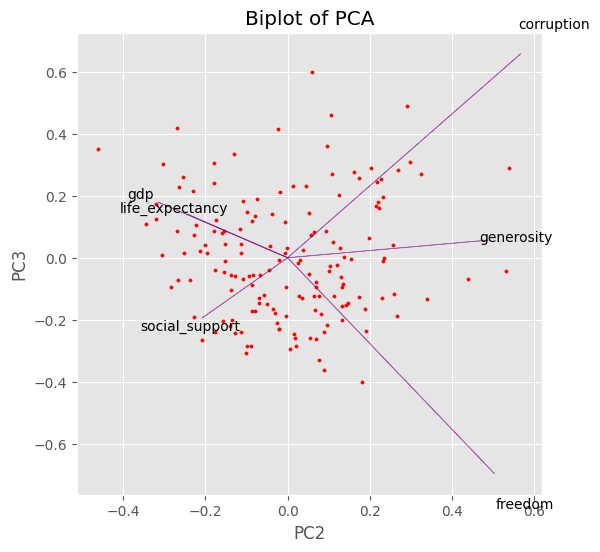

<Figure size 640x480 with 0 Axes>

In [41]:
fig, ax = plt.subplots(figsize = (6,6))
plt.title('Biplot of PCA')
 
biplot(PC,1,2, 
       np.transpose(pca.components_), cols_to_visualize)

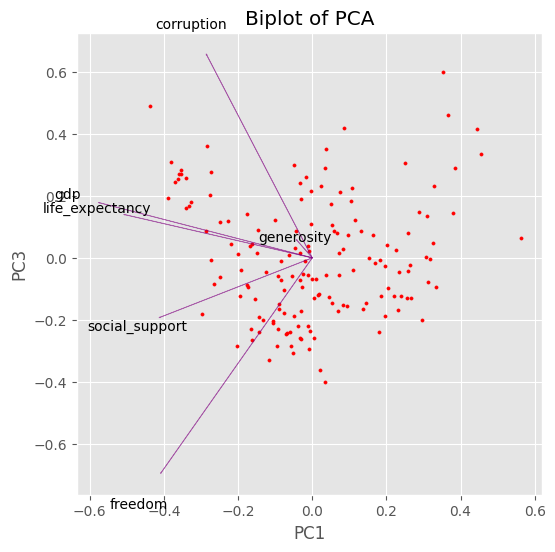

<Figure size 640x480 with 0 Axes>

In [42]:
fig, ax = plt.subplots(figsize = (6,6))
plt.title('Biplot of PCA')
 
biplot(PC,0,2, 
       np.transpose(pca.components_), cols_to_visualize)

In [43]:
df_scaled[cols_to_scale].head()

,gdp,social_support,life_expectancy,freedom,generosity,corruption
0,0.795724,0.977217,0.864154,0.944532,0.270318,0.867550
1,0.821259,0.968596,0.872918,0.938193,0.445230,0.905077
2,0.883610,0.974138,0.900964,0.955626,0.478799,0.752759
3,0.819477,1.000000,0.899211,0.936609,0.625442,0.260486
4,0.828979,0.937192,0.875548,0.882726,0.568905,0.657837


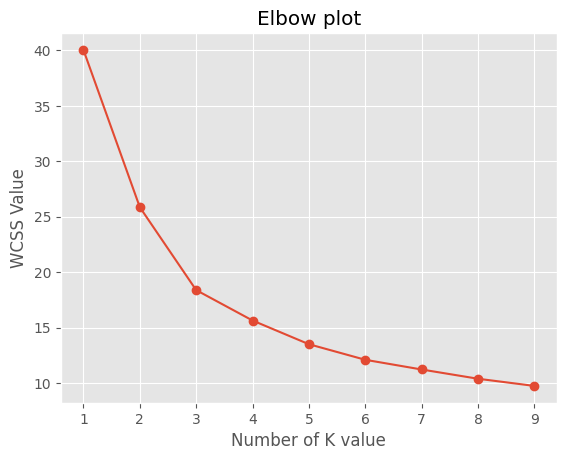

In [44]:
# Elbow Method 
# (untuk membantu menentukan jumlah klaster optimal)

from sklearn.cluster import KMeans
#K-Means choosing n_clusters
wcss = []

for i in range(1,10):
    kmeans = KMeans(n_clusters=i,random_state = 56)
    kmeans.fit(df_scaled[cols_to_scale])
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,10),wcss,"-o")
plt.title("Elbow plot")
plt.xlabel("Number of K value")
plt.ylabel("WCSS Value")
plt.show()

In [45]:
# Selecting 3 as cluster value

In [46]:
# Initialize the class object
kmeans = KMeans(n_clusters= 3)
# Predict the labels of clusters
label = kmeans.fit_predict(df_scaled[cols_to_scale])
print(label)

[2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 1 1 2 2 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 2 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 0 0 1 0 1 1 1 1 1 0
 0 1 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0]


In [47]:
# The centre of the clusters
centroids = kmeans.cluster_centers_

In [48]:
labels = kmeans.labels_
country = df["country"]
Kclusters = pd.DataFrame(zip(country, labels), columns=['Country', 'Subgroup'])

In [49]:
# Mengobservasi clusters berdasarkan Country
Kclusters.head()

,Country,Subgroup
0,Finland,2
1,Denmark,2
2,Norway,2
3,Iceland,2
4,Netherlands,2


In [50]:
Kclusters[Kclusters['Subgroup'] == 0]

,Country,Subgroup
66,Pakistan,0
73,Tajikistan,0
84,Nigeria,0
95,Cameroon,0
97,Ghana,0
98,Ivory Coast,0
99,Nepal,0
101,Benin,0
102,Congo (Brazzaville),0
104,Laos,0


In [51]:
Kclusters[Kclusters['Subgroup'] == 1]

,Country,Subgroup
11,Costa Rica,1
12,Israel,1
18,United States,1
19,Czech Republic,1
22,Mexico,1
...,...,...
125,Iraq,1
129,Sri Lanka,1
132,Ukraine,1
136,Egypt,1


In [52]:
Kclusters[Kclusters['Subgroup'] == 2]

,Country,Subgroup
0,Finland,2
1,Denmark,2
2,Norway,2
3,Iceland,2
4,Netherlands,2
5,Switzerland,2
6,Sweden,2
7,New Zealand,2
8,Canada,2
9,Austria,2


Text(0.5, 1.0, 'K-means clusters')

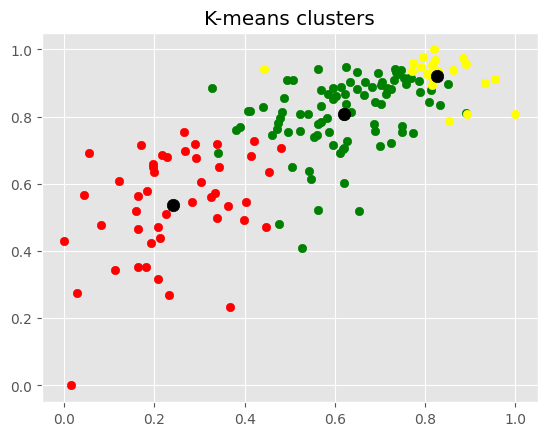

In [53]:
# Creating dataframes based on the labels
label_0 = df_scaled[cols_to_scale][label == 0]
label_1 = df_scaled[cols_to_scale][label == 1]
label_2 = df_scaled[cols_to_scale][label == 2]

# Ploting the kmeans
plt.scatter(label_0[cols_to_scale[0]], label_0[cols_to_scale[1]], color = 'red')
plt.scatter(label_1[cols_to_scale[0]], label_1[cols_to_scale[1]], color = 'green')
plt.scatter(label_2[cols_to_scale[0]], label_2[cols_to_scale[1]], color = 'yellow')

plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.title("K-means clusters")

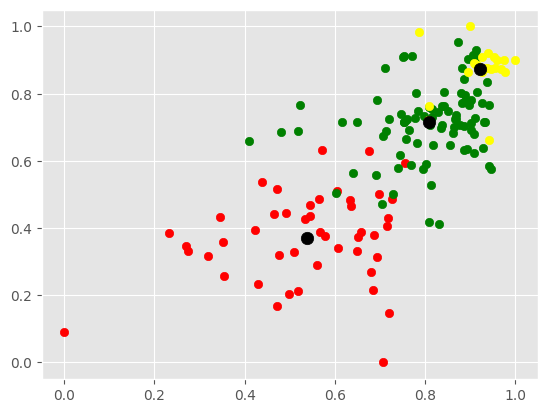

In [54]:
# Plot yang memperlihatkan clusters di sisi yang berbeda
plt.scatter(label_0[cols_to_scale[1]], label_0[cols_to_scale[2]], color = 'red')
plt.scatter(label_1[cols_to_scale[1]], label_1[cols_to_scale[2]], color = 'green')
plt.scatter(label_2[cols_to_scale[1]], label_2[cols_to_scale[2]], color = 'yellow')

plt.scatter(centroids[:,1] , centroids[:,2] , s = 80, color = 'k')

1    88
0    46
2    22
dtype: int64

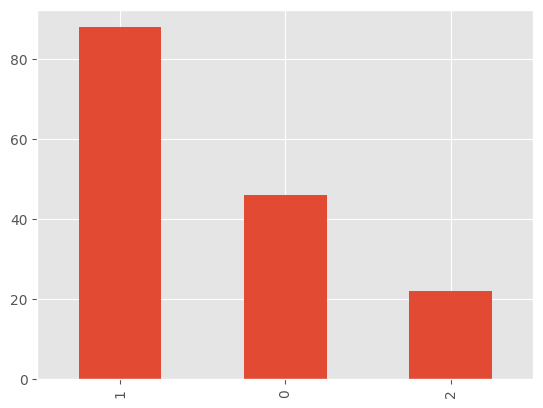

In [55]:
resultDfk = pd.DataFrame(label)
resultDfk.iloc[:,0].value_counts().plot.bar()
pd.Series(kmeans.labels_).value_counts()

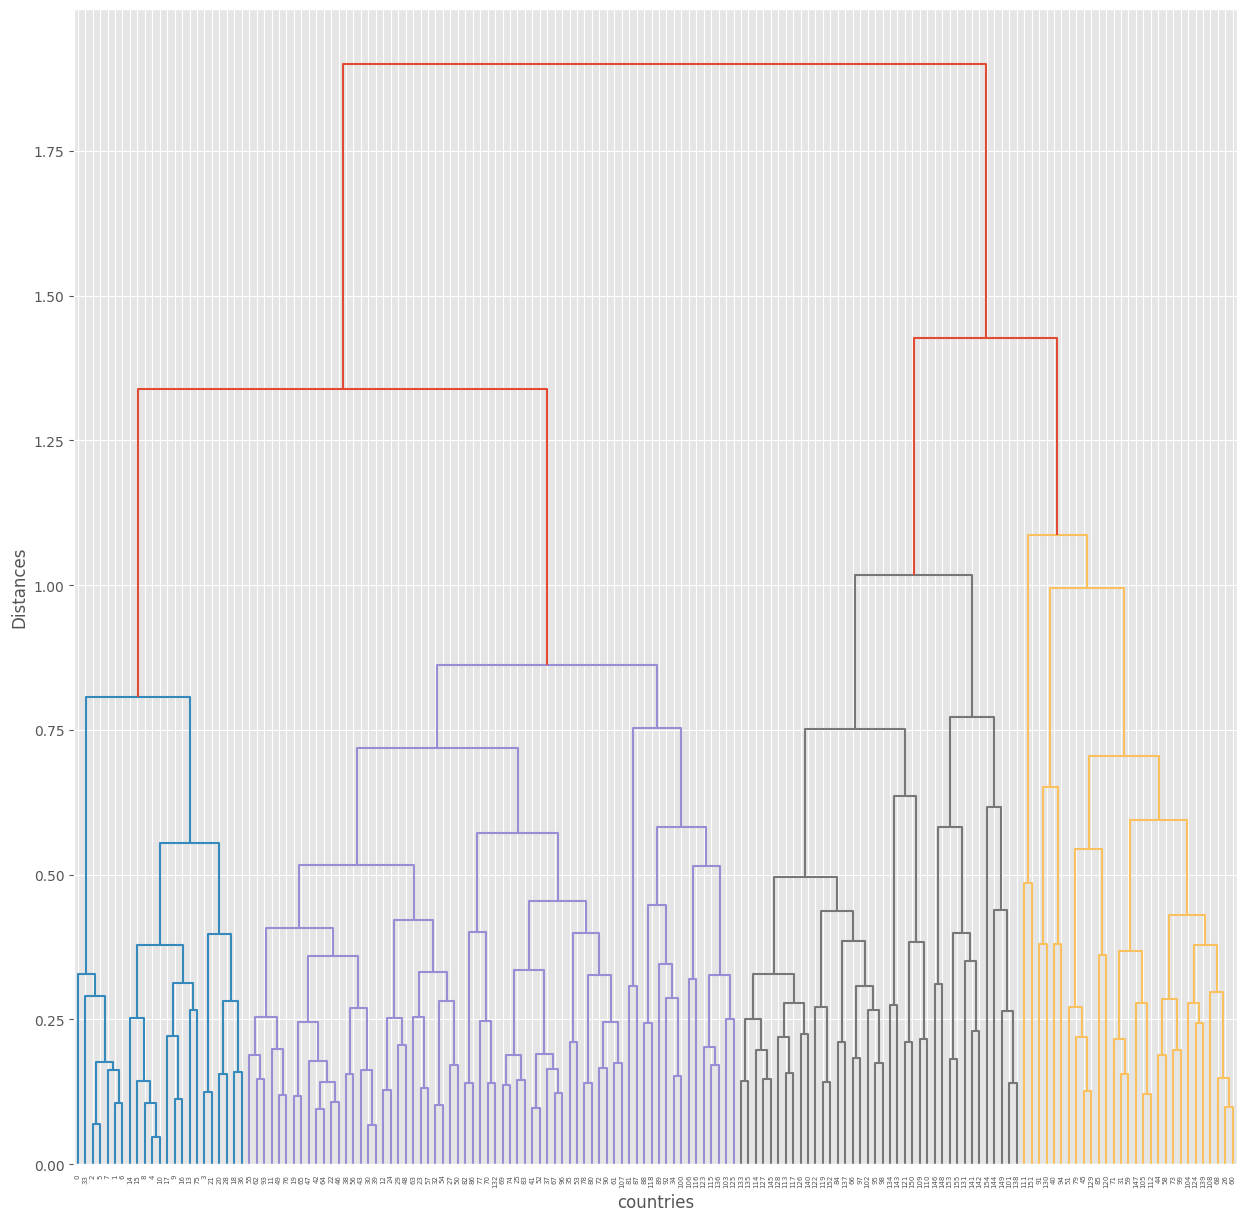

In [56]:
from scipy.cluster.hierarchy import linkage, dendrogram

fig,ax = plt.subplots(figsize = (15,15))
merg = linkage(df_scaled[cols_to_scale], method = "complete")
dendrogram(merg,leaf_rotation=90)
plt.xlabel("countries")
plt.ylabel("Distances")
plt.show()

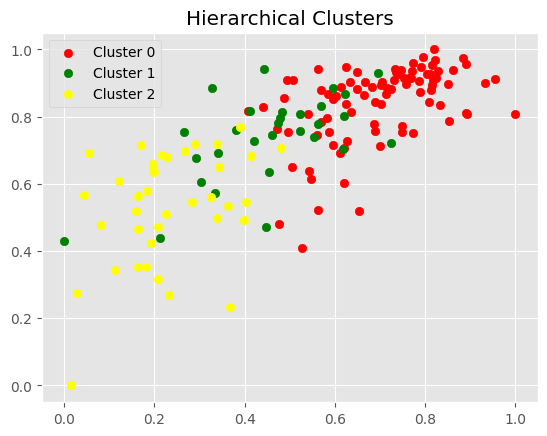

In [57]:
from sklearn.cluster import AgglomerativeClustering

hcluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')  
hcluster_labels = hcluster.fit_predict(df_scaled[cols_to_scale])

country = df["country"]
hclusters = pd.DataFrame(zip(country, hcluster_labels), columns=['Country', 'Subgroup'])

label_0 = df_scaled[cols_to_scale][hcluster_labels == 0]
label_1 = df_scaled[cols_to_scale][hcluster_labels == 1]
label_2 = df_scaled[cols_to_scale][hcluster_labels == 2]

# Plotting the hierarchical clusters
plt.scatter(label_0[cols_to_scale[0]], label_0[cols_to_scale[1]], color='red', label='Cluster 0')
plt.scatter(label_1[cols_to_scale[0]], label_1[cols_to_scale[1]], color='green', label='Cluster 1')
plt.scatter(label_2[cols_to_scale[0]], label_2[cols_to_scale[1]], color='yellow', label='Cluster 2')

plt.title("Hierarchical Clusters")
plt.legend()
plt.show()

In [58]:
resultDfk = pd.DataFrame(hcluster_labels)
resultDfk.iloc[:,0].value_counts()
pd.Series(hcluster_labels).value_counts()

0    89
2    38
1    29
dtype: int64

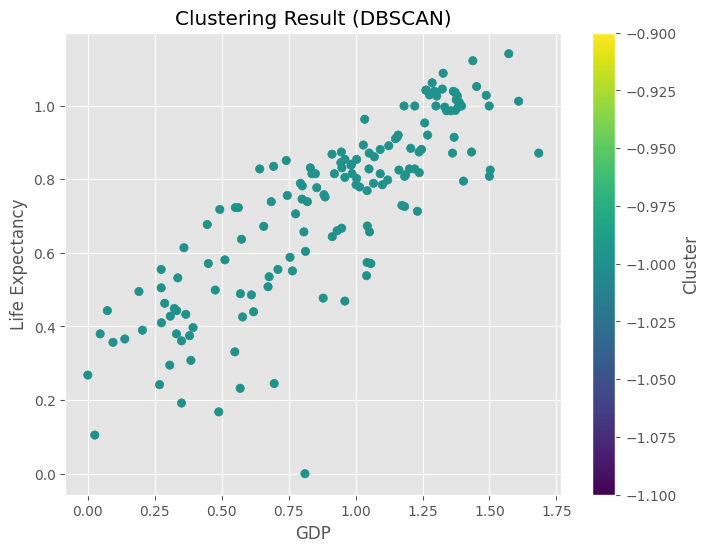

In [60]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Pilih kolom numerik untuk clustering
cols_to_cluster = ['gdp', 'social_support', 'life_expectancy', 'freedom', 'generosity', 'corruption']

# Normalisasi data untuk clustering
scaler = StandardScaler()
df_scaled[cols_to_cluster] = scaler.fit_transform(df[cols_to_cluster])

# Inisialisasi DBSCAN dengan nilai epsilon (eps) dan min_samples yang sesuai
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Melakukan clustering
clusters = dbscan.fit_predict(df_scaled[cols_to_cluster])

# Menambahkan hasil clustering ke dalam DataFrame
df['cluster'] = clusters

# Menampilkan jumlah setiap cluster yang terbentuk
df['cluster'].value_counts()

# Visualisasi hasil clustering dengan scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['gdp'], df['life_expectancy'], c=df['cluster'], cmap='viridis')
plt.title('Clustering Result (DBSCAN)')
plt.xlabel('GDP')
plt.ylabel('Life Expectancy')
plt.colorbar(label='Cluster')
plt.show()

In [63]:
dbscan = DBSCAN(eps=0.3, min_samples=5)

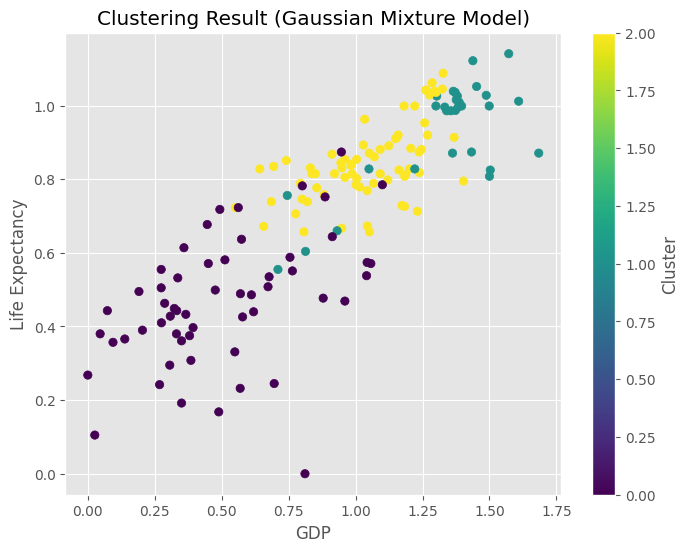

In [66]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

# Pilih kolom numerik untuk klasterisasi
cols_to_cluster = ['gdp', 'social_support', 'life_expectancy', 'freedom', 'generosity', 'corruption']

# Normalisasi data untuk klasterisasi
scaler = StandardScaler()
df_scaled[cols_to_cluster] = scaler.fit_transform(df[cols_to_cluster])

# Inisialisasi Gaussian Mixture Model dengan jumlah komponen klaster yang diinginkan
gmm = GaussianMixture(n_components=3, random_state=42)

# Melakukan klasterisasi
clusters = gmm.fit_predict(df_scaled[cols_to_cluster])

# Menambahkan hasil klasterisasi ke dalam DataFrame
df['cluster'] = clusters

# Menampilkan jumlah setiap klaster yang terbentuk
df['cluster'].value_counts()

# Visualisasi hasil klasterisasi dengan scatter plot (misalnya: gdp dan life_expectancy)
plt.figure(figsize=(8, 6))
plt.scatter(df['gdp'], df['life_expectancy'], c=df['cluster'], cmap='viridis')
plt.title('Clustering Result (Gaussian Mixture Model)')
plt.xlabel('GDP')
plt.ylabel('Life Expectancy')
plt.colorbar(label='Cluster')
plt.show()

In [72]:
def gmm(x, y):
    gm=mixture.GaussianMixture(n_components=x,covariance_type='full')
    gm.fit(y)
    gm_result=gm.predict(y)
    return(gm_result)

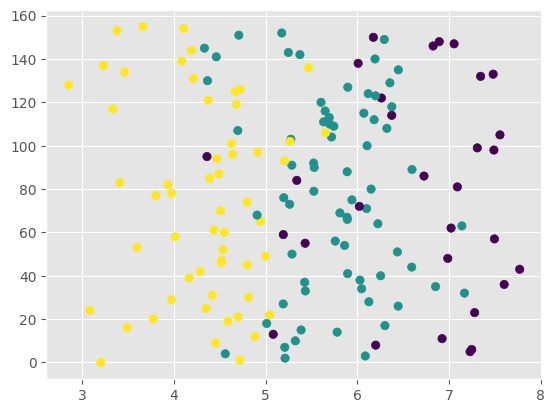

In [86]:
gm_result = gmm(3,df_scaled[cols_to_cluster])
data['gmm'] = pd.DataFrame(gm_result)
plt.scatter(data.iloc[:, 0], data.iloc[:, 9],  c=gm_result)
plt.show()